<a href="https://colab.research.google.com/github/junghoum/Hello-world/blob/main/n133-dimensionality-reduction-techniques/n133a-high-dimensional-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 3*

# 📝 Assignment



## 1. 주어진 matrix에 대해서, numpy를 사용하여, `eigenvalue`와 `eigenvector`를 구하고, 각각 `value`, `vector`에 저장하세요.

\begin{bmatrix} 4 & 2 \\ 2 & 4 \end{bmatrix}

In [8]:
import numpy as np

eig = np.linalg.eig
matrix = np.matrix
testmatrix = matrix([[4,2],[2,4]])


value = eig(testmatrix)[0]

vector = eig(testmatrix)[1]

print(value, vector)

[6. 2.] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


## 2. Penguins dataset을 사용하여 numerical feature 4개에 대해서 2차원으로 PCA를 시행 후 PC1 & PC2를 사용하여 scatter plot을 그리세요.

- 데이터셋 사용을 위해, 다음 링크를 참조하세요.

<http://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset>

- 4개의 feature는 `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g` 입니다.

- 이후 2개의 PC를 이용하여 설명되는 variance의 ratio를 `ratio`에 저장하세요.

- 다음과 같은 결과가 나와야 합니다.

<img src='https://i.imgur.com/5BCEHeL.png'>

In [25]:
import pandas as pd
import seaborn as sb

df = sb.load_dataset('penguins')

df['species'].unique()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [28]:

df.isna().sum()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

df.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [31]:
from sklearn.preprocessing import StandardScaler

features = df.loc[:, 'bill_length_mm' : 'body_mass_g'].values

species = df['species'].values

features = StandardScaler().fit_transform(features)

columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

pd.DataFrame(features, columns = columns).head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) # 주성분을 몇 개로 할지 결정하기

printcipalComponents = pca.fit_transform(features) # 주성분값 가져오기

principaldf = pd.DataFrame(data = printcipalComponents, columns = ['PC1','PC2'])

finaldf = finaldf = pd.concat([principaldf, df[['species']]], axis = 1)

finaldf

,PC1,PC2,species
0,-1.853593,0.032069,Adelie
1,-1.316254,-0.443527,Adelie
2,-1.376605,-0.161230,Adelie
3,-1.885288,-0.012351,Adelie
4,-1.919981,0.817598,Adelie
...,...,...,...
328,1.997716,-0.976771,Gentoo
329,1.832651,-0.784510,Gentoo
330,2.751505,0.266556,Gentoo
331,1.713854,-0.725875,Gentoo


In [58]:
ratio = pca.explained_variance_ratio_

ratio

array([0.68633893, 0.19452929])

ValueError: ignored

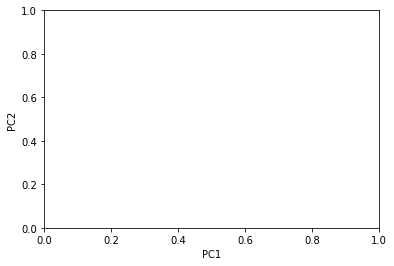

In [57]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

targets = ['Adelie', 'Chinstrap', 'Gentoo']
colors = ['#1F77B4', '#FF7F0E', '#2CA02c']
for target, color in zip(targets, colors):
  sps = finaldf['species'] == target
  ax.scatter(finaldf.loc[sps, 'PC1']
             , finaldf.loc[sps, 'PC2']
             , c = colors
             , s = 50
             , marker = 'o'
             , edgecolor = 'w')
  ax.legend(targets, title = 'species', loc = 'lower right')

  plt.show()

## 🔥 도전 과제

### "Scree Plot" 에 대해서 알아보고, 위에서 PCA로 만든 데이터셋을 사용하여 만들어보세요. 90%의 내용을 설명하기 위해서, 몇개의 PC를 사용해야 하나요?


In [ ]:
# 이곳에 답안을 작성하시기 바랍니다